# House Prices - Advanced Regression Techniques

Description
Start here if...
You have some experience with R or Python and machine learning basics. This is a perfect competition for data science students who have completed an online course in machine learning and are looking to expand their skill set before trying a featured competition. 

💡Getting Started Notebook
To get started quickly, feel free to take advantage of this starter notebook.

### Competition Description


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Practice Skills
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting
Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

Photo by Tom Thain on Unsplash.

## Imports and Lab Setup



In [1]:
# for array computations and loading data
import numpy as np
import pandas as pd
# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for building and training neural networks
import tensorflow as tf

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

%matplotlib widget
import matplotlib.pyplot as plt


from sklearn.linear_model import Ridge

# Data Input

In [2]:
df=pd.read_csv('data/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
# Count the number of NaN values in the entire DataFrame
num_nan_in_df = df_num.isna().sum().sum()
print(f'Total number of NaN values in the DataFrame: {num_nan_in_df}')

Total number of NaN values in the DataFrame: 348


In [7]:
# Replace NaNs with the mean of the column:
#df_num_filled = df_num.fillna(df_num.mean())

In [8]:
# Remove cloumn with NaN values

df_num_removed = df_num.dropna(axis=1)

In [9]:
# Count the number of NaN values in the entire DataFrame
num_nan_in_df = df_num_removed.isna().sum().sum()
print(f'Total number of NaN values in the DataFrame: {num_nan_in_df}')

Total number of NaN values in the DataFrame: 0


In [10]:
df_num_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

In [11]:
df_num_removed.to_csv('df_num_removed.csv', index=False)

In [12]:
x = np.array(df_num_removed.iloc[:, :-2])
y = np.array(df_num_removed['SalePrice'])	


In [13]:
x.shape

(1460, 33)

In [14]:
y.shape

(1460,)

In [15]:
print(x[:5])
print(y[:5])

[[    1    60  8450     7     5  2003  2003   706     0   150   856   856
    854     0  1710     1     0     2     1     3     1     8     0     2
    548     0    61     0     0     0     0     0     2]
 [    2    20  9600     6     8  1976  1976   978     0   284  1262  1262
      0     0  1262     0     1     2     0     3     1     6     1     2
    460   298     0     0     0     0     0     0     5]
 [    3    60 11250     7     5  2001  2002   486     0   434   920   920
    866     0  1786     1     0     2     1     3     1     6     1     2
    608     0    42     0     0     0     0     0     9]
 [    4    70  9550     7     5  1915  1970   216     0   540   756   961
    756     0  1717     1     0     1     0     3     1     7     1     3
    642     0    35   272     0     0     0     0     2]
 [    5    60 14260     8     5  2000  2000   655     0   490  1145  1145
   1053     0  2198     1     0     2     1     4     1     9     1     3
    836   192    84     0     0 

In [16]:
x.reshape(-1, 1)
y.reshape(-1, 1)

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]], dtype=int64)

In [17]:
print(len(x))
print(len(y))

1460
1460


## Split the dataset into training, cross validation, and test sets






In [18]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (876, 33)
the shape of the training set (target) is: (876,)

the shape of the cross validation set (input) is: (292, 33)
the shape of the cross validation set (target) is: (292,)

the shape of the test set (input) is: (292, 33)
the shape of the test set (target) is: (292,)


## Plotting data

In [19]:
""""
from sklearn import dummy, metrics

# Assume y is your target variable
y_mean = np.mean(y)

# Create a dummy regressor that will always predict the mean
dummy_regr = dummy.DummyRegressor(strategy="mean")
dummy_regr.fit(x, y)

# Now you can use dummy_regr.predict(X) to get the baseline predictions
y_pred_baseline = dummy_regr.predict(x)

# And you can calculate the baseline error, for example using Mean Squared Error
mse_baseline = metrics.mean_squared_error(y, y_pred_baseline)

"""

'"\nfrom sklearn import dummy, metrics\n\n# Assume y is your target variable\ny_mean = np.mean(y)\n\n# Create a dummy regressor that will always predict the mean\ndummy_regr = dummy.DummyRegressor(strategy="mean")\ndummy_regr.fit(x, y)\n\n# Now you can use dummy_regr.predict(X) to get the baseline predictions\ny_pred_baseline = dummy_regr.predict(x)\n\n# And you can calculate the baseline error, for example using Mean Squared Error\nmse_baseline = metrics.mean_squared_error(y, y_pred_baseline)\n\n'

In [20]:

"""
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x, y_pred_baseline, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train, y_train, color = "red",           label="train")
ax.scatter(x_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(x_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

"""

'\nfig, ax = plt.subplots(1,1,figsize=(4,4))\nax.plot(x, y_pred_baseline, "--", color = "orangered", label="y_ideal", lw=1)\nax.set_title("Training, CV, Test",fontsize = 14)\nax.set_xlabel("x")\nax.set_ylabel("y")\n\nax.scatter(x_train, y_train, color = "red",           label="train")\nax.scatter(x_cv, y_cv,       color = dlc["dlorange"], label="cv")\nax.scatter(x_test, y_test,   color = dlc["dlblue"],   label="test")\nax.legend(loc=\'upper left\')\nplt.show()\n\n'

## Fit a linear model


In [21]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(x_train)
X_cv_scaled = scaler_linear.fit_transform(x_cv)
X_test_scaled = scaler_linear.fit_transform(x_test)


### Train the model



In [22]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train )

LinearRegression()

In [23]:
X_train_scaled

array([[ 0.69, -0.88,  0.44, ..., -0.06, -0.09, -0.48],
       [-0.65, -0.88,  3.89, ..., -0.06, -0.09, -1.23],
       [-1.32, -0.88,  0.17, ..., -0.06, -0.09, -0.1 ],
       ...,
       [ 0.86,  0.31, -0.35, ..., -0.06, -0.09, -1.23],
       [-1.17,  2.45, -0.82, ..., -0.06, -0.09,  0.65],
       [ 0.78, -0.64,  0.67, ..., -0.06,  0.81,  0.65]])

In [24]:
X_cv_scaled

array([[ 0.37,  0.05, -0.31, ..., -0.08, -0.17,  1.34],
       [-0.93,  1.43, -0.48, ..., -0.08, -0.17,  2.07],
       [-0.43,  1.43, -0.67, ..., -0.08, -0.17,  1.34],
       ...,
       [-1.  ,  0.05,  0.17, ..., -0.08, -0.17, -0.11],
       [ 0.37,  0.74, -0.31, ..., -0.08, -0.17, -0.11],
       [ 0.57, -0.63, -0.42, ..., -0.08, -0.17,  0.61]])

### Evaluate the Model


In [25]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# for-loop implementation
total_squared_error = 0


training MSE (using sklearn function): 542485067.6431811


In [26]:

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")


Cross validation MSE: 9.38039044298737e+30


## Adding Polynomial Features

### choosing degree and lambda (regulation)

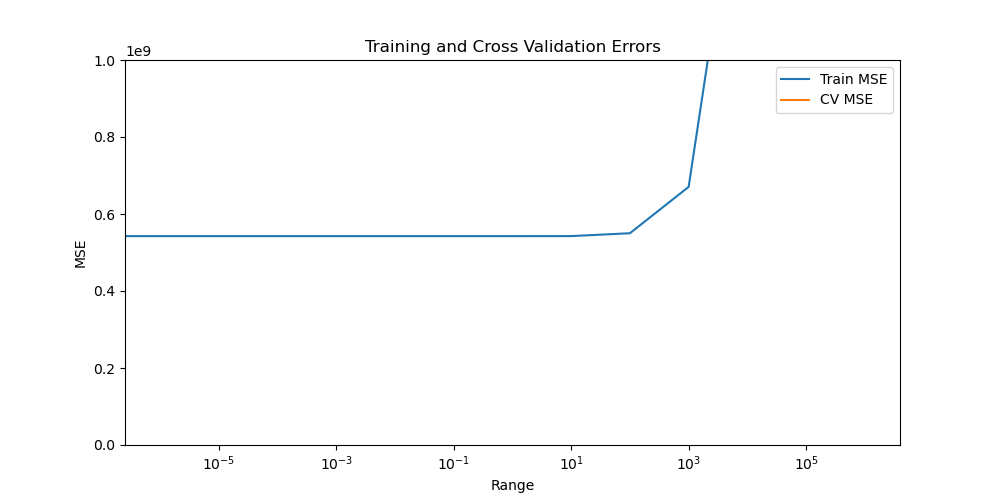

The optimal lambda for degree value 1 regularization is: 0.0
The minimum cross validation MSE for degree value 1 is: 1094971381.5457566


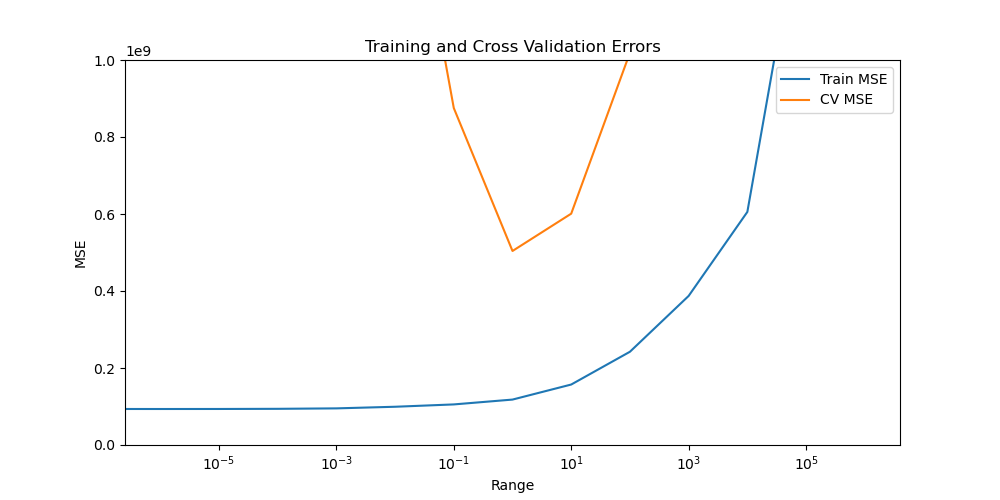

The optimal lambda for degree value 2 regularization is: 1.0
The minimum cross validation MSE for degree value 2 is: 503948818.8143474


c:\Users\sasin\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=2.80864e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


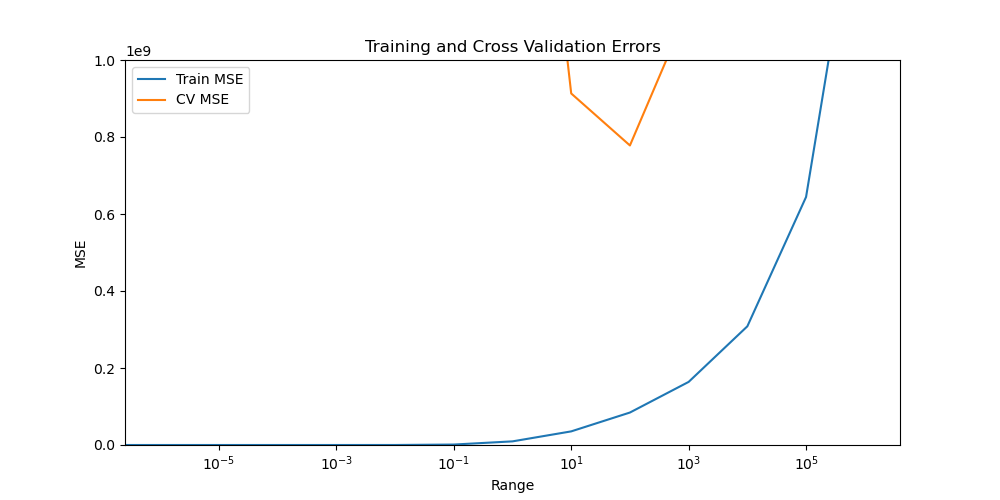

The optimal lambda for degree value 3 regularization is: 100.0
The minimum cross validation MSE for degree value 3 is: 778042745.8997878


c:\Users\sasin\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=5.52188e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


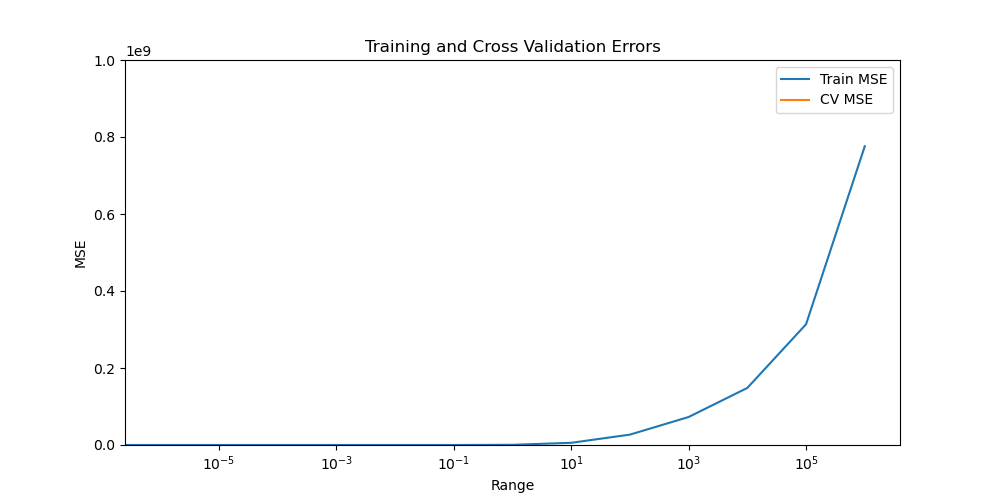

The optimal lambda for degree value 4 regularization is: 1000.0
The minimum cross validation MSE for degree value 4 is: 1271873316.471755
The optimal degree for regularization is: 2.0
The lambda for the optimal degree is: 1.0


In [93]:
# Initialize lists to save the errors, models, and feature transforms
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100,1000,10000,100000,1000000])
train_mses_mses = []
cv_mses_mses = []
num_steps = len(lambda_range)
optimal_lambdas = []
degrees = []
maxdegree = 4

# Function to plot the training and cross validation errors 
def plot_train_cv_mses(range, train, cv, title):
    plt.figure(figsize=(10, 5))
    plt.plot(range, train, label='Train MSE')
    plt.plot(range, cv, label='CV MSE')
    plt.legend()
    plt.xlabel('Range')
    plt.ylabel('MSE')
    plt.ylim(0, 1e10)
    plt.xscale('log')  # This is to make the lambda range more readable
    plt.title(title)
    plt.show()


# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,maxdegree+1):

    train_mses = []
    cv_mses = []
    models = []
    polys = []
    scalers = []
    optimal_degree = degree
    for i in range(num_steps):
    
        lambda_ = lambda_range[i]

        # Add polynomial features to the training set
        poly = PolynomialFeatures(optimal_degree, include_bias=False)
        X_train_mapped = poly.fit_transform(x_train)
    
        # Scale the training set
        scaler_poly = StandardScaler()
        X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    
        # Create and train the model
        model = Ridge(alpha=lambda_)
        model.fit(X_train_mapped_scaled, y_train )
    
        # Compute the training MSE
        yhat = model.predict(X_train_mapped_scaled)
        train_mse = mean_squared_error(y_train, yhat) / 2
        train_mses.append(train_mse)
    
        # Add polynomial features and scale the cross validation set
        X_cv_mapped = poly.transform(x_cv)
        X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
        # Compute the cross validation MSE
        yhat = model.predict(X_cv_mapped_scaled)
        cv_mse = mean_squared_error(y_cv, yhat) / 2
        cv_mses.append(cv_mse)

    plot_train_cv_mses(lambda_range, train_mses, cv_mses, 'Training and Cross Validation Errors')

    # Find the index of the smallest cross-validation MSE
    optimal_lambda_index_for_degree = np.argmin(cv_mses)

    # Find the optimal lambda using the index
    optimal_lambda_for_degree = lambda_range[optimal_lambda_index_for_degree]

    print(f"The optimal lambda for degree value {degree} regularization is: {optimal_lambda_for_degree}")
    print(f"The minimum cross validation MSE for degree value {degree} is: {cv_mses[optimal_lambda_index_for_degree]}")

    cv_mses_mses.append(cv_mses[optimal_lambda_index_for_degree])
    train_mses_mses.append(train_mses[optimal_lambda_index_for_degree]) 
    optimal_lambdas.append(optimal_lambda_for_degree)
    degrees.append(degree)
    
optimal_degree_index = np.argmin(cv_mses_mses)
optimal_degree = optimal_lambdas[optimal_degree_index]

print(f"The optimal degree for regularization is: {optimal_degree + 1}")
print(f"The lambda for the optimal degree is: {optimal_lambdas[optimal_degree_index]}")


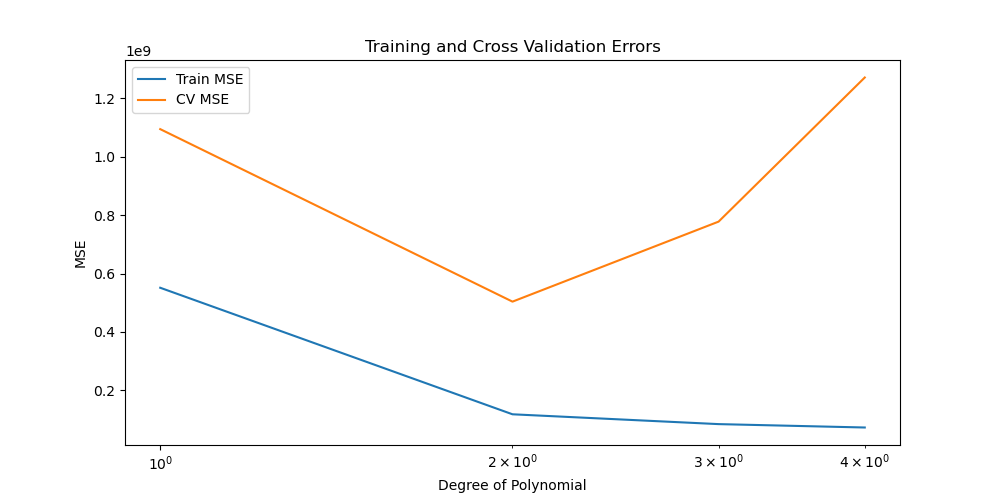

In [33]:

plot_train_cv_mses(degrees, train_mses_mses, cv_mses_mses, 'Training and Cross Validation Errors')

## Accuracey test

In [94]:
lambda_= 1.0
optimal_degree = 2

In [95]:
lambda_ = float(lambda_)
degree = int(optimal_degree)
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

# Scale the features using the z-score
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

# Train the model
model = Ridge(alpha=lambda_)
model.fit(X_train_mapped_scaled, y_train)


Ridge()

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the target values using the model
yhat_test = model.predict(X_test_mapped_scaled)

# Calculate the metrics

mae_test = mean_absolute_error(y_test, yhat_test)
mse_test = mean_squared_error(y_test, yhat_test)
r2_test = r2_score(y_test, yhat_test)

print('Test MAE: %f' % mae_test)
print('Test MSE: %f' % mse_test)
print('Test R2 Score: %f' % r2_test)

print("Model accuracy: ", r2_test * 100)

Test MAE: 25093.380833
Test MSE: 1439606245.389989
Test R2 Score: 0.743262
Model accuracy:  74.32616658693021


## Neural Networks

### Prepare the Data

In [97]:
# Add polynomial features
degree = int(optimal_degree)
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

In [98]:
# Scale the features using the z-score
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

### Build and train the models

In [104]:
def build_models(lambda_):
    
    tf.random.set_seed(20)
    
    model_1 = Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(15, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ],
        name='model_1'
    )

    model_2 = Sequential(
        [
            Dense(20, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(12, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(12, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(20, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ],
        name='model_2'
    )

    model_3 = Sequential(
        [
            Dense(32, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(16, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(8, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(4, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(12, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ],
        name='model_3'
    )
    
    model_list = [model_1, model_2, model_3]
    
    return model_list

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_cv_mses = []

# Build the models
nn_models = build_models(lambda_)

# Loop over the the models
for model in nn_models:
    
    # Setup the loss and optimizer
    model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(f"Training {model.name}...")
    
    # Train the model
    model.fit(
        X_train_mapped_scaled, y_train,
        epochs=300,
        verbose=0
    )
    
    print("Done!\n")

    
    # Record the training MSEs
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)
    
    # Record the cross validation MSEs 
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

plot_train_cv_mses(np.range(1:4),nn_train_mses, nn_cv_mses)

SyntaxError: invalid syntax (1143451000.py, line 51)

From the recorded errors, you can decide which is the best model for your application. Look at the results above and see if you agree with the selected `model_num` below. Finally, you will compute the test error to estimate how well it generalizes to new examples.

In [19]:
# Select the model with the lowest CV MSE
model_num = 3

# Compute the test MSE
yhat = nn_models[model_num-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Selected Model: 3
Training MSE: 73.40
Cross Validation MSE: 112.27
Test MSE: 131.56


## Classification

In this last part of the lab, you will practice model evaluation and selection on a classification task. The process will be similar, with the main difference being the computation of the errors. You will see that in the following sections.

### Load the Dataset

First, you will load a dataset for a binary classification task. It has 200 examples of two input features (`x1` and `x2`), and a target `y` of either `0` or `1`.

In [20]:
# Load the dataset from a text file
data = np.loadtxt('./data/data_w3_ex2.csv', delimiter=',')

# Split the inputs and outputs into separate arrays
x_bc = data[:,:-1]
y_bc = data[:,-1]

# Convert y into 2-D because the commands later will require it (x is already 2-D)
y_bc = np.expand_dims(y_bc, axis=1)

print(f"the shape of the inputs x is: {x_bc.shape}")
print(f"the shape of the targets y is: {y_bc.shape}")

the shape of the inputs x is: (200, 2)
the shape of the targets y is: (200, 1)


You can plot the dataset to examine how the examples are separated.

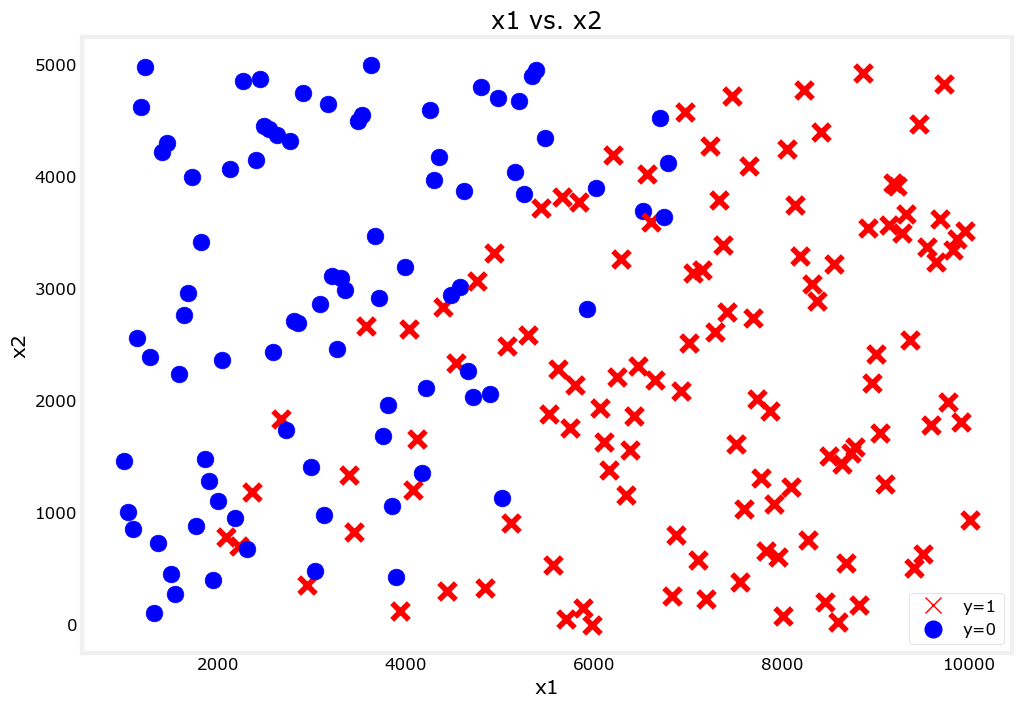

In [21]:
utils.plot_bc_dataset(x=x_bc, y=y_bc, title="x1 vs. x2")

### Split and prepare the dataset

Next, you will generate the training, cross validation, and test sets. You will use the same 60/20/20 proportions as before. You will also scale the features as you did in the previous section.

In [22]:
from sklearn.model_selection import train_test_split

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables.
x_bc_train, x_, y_bc_train, y_ = train_test_split(x_bc, y_bc, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_bc_cv, x_bc_test, y_bc_cv, y_bc_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_bc_train.shape}")
print(f"the shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_bc_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_bc_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_bc_test.shape}")
print(f"the shape of the test set (target) is: {y_bc_test.shape}")

the shape of the training set (input) is: (120, 2)
the shape of the training set (target) is: (120, 1)

the shape of the cross validation set (input) is: (40, 2)
the shape of the cross validation set (target) is: (40, 1)

the shape of the test set (input) is: (40, 2)
the shape of the test set (target) is: (40, 1)


In [23]:
# Scale the features

# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
x_bc_train_scaled = scaler_linear.fit_transform(x_bc_train)
x_bc_cv_scaled = scaler_linear.transform(x_bc_cv)
x_bc_test_scaled = scaler_linear.transform(x_bc_test)

### Evaluating the error for classification models

In the previous sections on regression models, you used the mean squared error to measure how well your model is doing. For classification, you can get a similar metric by getting the fraction of the data that the model has misclassified. For example, if your model made wrong predictions for 2 samples out of 5, then you will report an error of `40%` or `0.4`. The code below demonstrates this using a for-loop and also with Numpy's [`mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) function. 

In [24]:
# Sample model output
probabilities = np.array([0.2, 0.6, 0.7, 0.3, 0.8])

# Apply a threshold to the model output. If greater than 0.5, set to 1. Else 0.
predictions = np.where(probabilities >= 0.5, 1, 0)

# Ground truth labels
ground_truth = np.array([1, 1, 1, 1, 1])

# Initialize counter for misclassified data
misclassified = 0

# Get number of predictions
num_predictions = len(predictions)

# Loop over each prediction
for i in range(num_predictions):
    
    # Check if it matches the ground truth
    if predictions[i] != ground_truth[i]:
        
        # Add one to the counter if the prediction is wrong
        misclassified += 1

# Compute the fraction of the data that the model misclassified
fraction_error = misclassified/num_predictions

print(f"probabilities: {probabilities}")
print(f"predictions with threshold=0.5: {predictions}")
print(f"targets: {ground_truth}")
print(f"fraction of misclassified data (for-loop): {fraction_error}")
print(f"fraction of misclassified data (with np.mean()): {np.mean(predictions != ground_truth)}")

probabilities: [0.2 0.6 0.7 0.3 0.8]
predictions with threshold=0.5: [0 1 1 0 1]
targets: [1 1 1 1 1]
fraction of misclassified data (for-loop): 0.4
fraction of misclassified data (with np.mean()): 0.4


### Build and train the model

You will use the same neural network architectures in the previous section so you can call the `build_models()` function again to create new instances of these models. 

You will follow the recommended approach mentioned last week where you use a `linear` activation for the output layer (instead of `sigmoid`) then set `from_logits=True` when declaring the loss function of the model. You will use the [binary crossentropy loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) because this is a binary classification problem.

After training, you will use a [sigmoid function](https://www.tensorflow.org/api_docs/python/tf/math/sigmoid) to convert the model outputs into probabilities. From there, you can set a threshold and get the fraction of misclassified examples from the training and cross validation sets.

You can see all these in the code cell below.

In [25]:
# Initialize lists that will contain the errors for each model
nn_train_error = []
nn_cv_error = []

# Build the models
models_bc = utils.build_models()

# Loop over each model
for model in models_bc:
    
    # Setup the loss and optimizer
    model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    )

    print(f"Training {model.name}...")

    # Train the model
    model.fit(
        x_bc_train_scaled, y_bc_train,
        epochs=200,
        verbose=0
    )
    
    print("Done!\n")
    
    # Set the threshold for classification
    threshold = 0.5
    
    # Record the fraction of misclassified examples for the training set
    yhat = model.predict(x_bc_train_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    train_error = np.mean(yhat != y_bc_train)
    nn_train_error.append(train_error)

    # Record the fraction of misclassified examples for the cross validation set
    yhat = model.predict(x_bc_cv_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    cv_error = np.mean(yhat != y_bc_cv)
    nn_cv_error.append(cv_error)

# Print the result
for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
        )

Training model_1...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training model_2...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training model_3...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Model 1: Training Set Classification Error: 0.05000, CV Set Classification Error: 0.10000
Model 2: Training Set Classification Error: 0.05000, CV Set Classification Error: 0.15000
Model 3: Training Set Classification Error: 0.06667, CV Set Classification Error: 0.10000


From the output above, you can choose which one performed best. If there is a tie on the cross validation set error, then you can add another criteria to break it. For example, you can choose the one with a lower training error. A more common approach is to choose the smaller model because it saves computational resources. In our example, Model 1 is the smallest and Model 3 is the largest.

Finally, you can compute the test error to report the model's generalization error.

In [26]:
# Select the model with the lowest error
model_num = 3

# Compute the test error
yhat = models_bc[model_num-1].predict(x_bc_test_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_error[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Selected Model: 3
Training Set Classification Error: 0.0667
CV Set Classification Error: 0.1000
Test Set Classification Error: 0.1750


## Wrap Up

In this lab, you practiced evaluating a model's performance and choosing between different model configurations. You split your datasets into training, cross validation, and test sets and saw how each of these are used in machine learning applications. In the next section of the course, you will see more tips on how to improve your models by diagnosing bias and variance. Keep it up!